# Data Cleaning Project for Brazilian E-commerce

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
import datetime as dt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline
plt.style.use('tableau-colorblind10')

D:\DOWLOAD\Anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# I. OVERVIEW DATA

### Join data

In [2]:
customers = pd.read_csv('olist_customers_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_payments = pd.read_csv('olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
product_category_name = pd.read_csv('product_category_name_translation.csv')

### Orders

In [3]:
orders.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [5]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [6]:
orders['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

### Products

In [7]:
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [8]:
products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [9]:
products.nunique()

product_id                    32951
product_category_name            73
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

In [10]:
products.drop(columns=['product_name_lenght','product_description_lenght'], axis=1, inplace=True)

In [11]:
products

,product_id,product_category_name,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,2.0,700.0,31.0,13.0,20.0


### Order_items

In [12]:
order_items.sample(5)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
21430,3104bcaa250792a77ce1651711291eaf,1,7e0dc102074f8285580c9777f79c90cf,e26901d5ab434ce92fd9b5c256820a4e,2017-03-21 10:22:09,34.90,14.52
54030,7ad98754c4b268d09d188885ab8145ef,1,03e931f387c2dd5b006aecdb12515b2e,1900267e848ceeba8fa32d80c1a5f5a8,2018-02-26 07:15:37,53.00,12.71
80233,b68d52eed868239b2bf137c03c5576b1,1,c68fdf078b3ec0596bbc5c7ac409e458,d2374cbcbb3ca4ab1086534108cc3ab7,2017-11-30 01:38:45,36.90,12.69
75320,ab89bb4480224d68ca99f20929ab77ac,1,48428054567e07738a70f9d2a9fa0475,cc419e0650a3c5ba77189a1882b7556a,2017-12-14 23:18:36,56.99,8.72
45871,681c82d8dee3250b148aaabdd68a59ff,2,8ed094bfe076c568f6bb10feada3f75d,7c67e1448b00f6e969d365cea6b010ab,2018-03-14 15:55:27,186.99,29.68


### Merging these tables ( hợp nhất các bảng)
1.order_items 
2.products
3.sellers
4.orders
5.customers
6.order_reviews
7.order_payments
8.product_category_name

In [13]:
order_items_products = pd.merge(order_items,products,on='product_id',how='outer')
order_items_products_sellers = pd.merge(order_items_products,sellers, on='seller_id',how='outer')
two_order_items_products_sellers = pd.merge(order_items_products_sellers,orders,on='order_id',how='outer')
two_order_items_products_sellers_customer = pd.merge(two_order_items_products_sellers,customers,on='customer_id',how='outer')
two_order_items_products_sellers_customer_reviews = pd.merge(two_order_items_products_sellers_customer,order_reviews,on='order_id',how='outer')
two_order_items_products_sellers_customer_reviews_payments = pd.merge(two_order_items_products_sellers_customer_reviews,order_payments,on='order_id',how='outer')
two_order_items_products_sellers_customer_reviews_payments_category = two_order_items_products_sellers_customer_reviews_payments.merge(product_category_name, on='product_category_name', how='left')
two_order_items_products_sellers_customer_reviews_payments_category['product_category_name'] = two_order_items_products_sellers_customer_reviews_payments_category['product_category_name_english']
two_order_items_products_sellers_customer_reviews_payments_category.drop(columns = ['product_category_name','review_comment_title'], axis=1, inplace=True)

In [14]:
df = two_order_items_products_sellers_customer_reviews_payments_category

In [15]:
df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'product_photos_qty',
       'product_weight_g', 'product_length_cm', 'product_height_cm',
       'product_width_cm', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'customer_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'review_id', 'review_score', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value',
       'product_category_name_english'],
      dtype='object')

### An overview about correlation between columns in the dataset

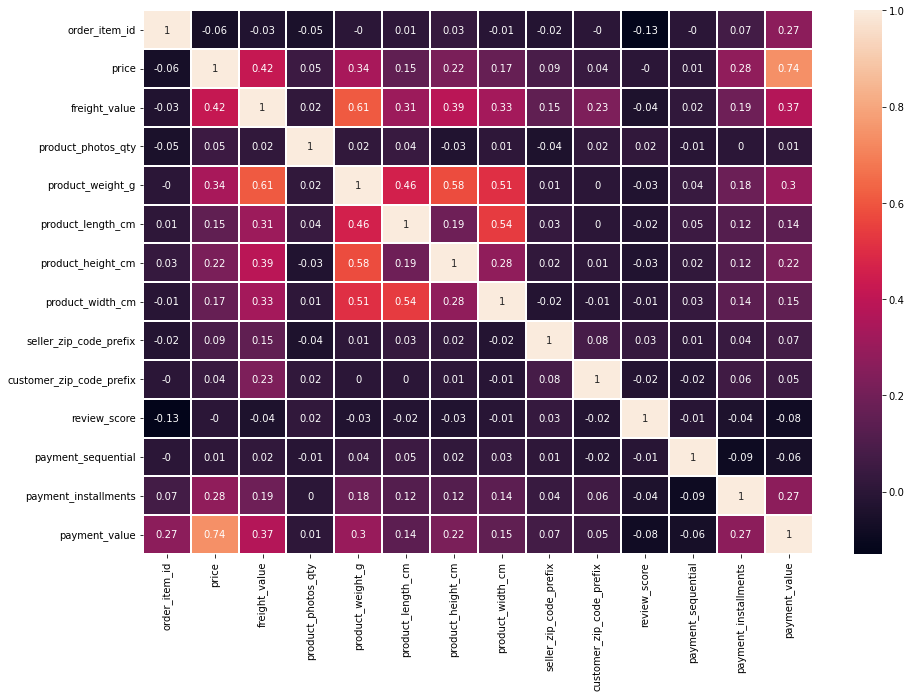

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(round(df.corr(),2), linewidth=0.2, annot=True, );

# II. DATA CLEANING & PROCESSING

### Xử lý Geolocation

In [17]:
# Merging geolocation dataset with the dataframe ( hợp nhất vị trí địa lý với dataframe)
geolocation.duplicated().sum()

261831

In [18]:
geolocation.shape

(1000163, 5)

In [19]:
geolocation[geolocation.duplicated()]

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
15,1046,-23.546081,-46.644820,sao paulo,SP
44,1046,-23.546081,-46.644820,sao paulo,SP
65,1046,-23.546081,-46.644820,sao paulo,SP
66,1009,-23.546935,-46.636588,sao paulo,SP
67,1046,-23.546081,-46.644820,sao paulo,SP
...,...,...,...,...,...
1000153,99970,-28.343273,-51.873734,ciriaco,RS
1000154,99950,-28.070493,-52.011342,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS


In [20]:
# removing redundant rows ( loại bỏ các hàng trùng lặp)
geolocation.drop_duplicates(inplace=True)

In [21]:
geolocation.shape

(738332, 5)

In [22]:
# calculate mean_lat and mean_lng based on each geolocation_zip_code_prefix ( tính gtri trung bình dựa trên vị trí địa lý)
mean_lat = geolocation.groupby('geolocation_zip_code_prefix')['geolocation_lat'].mean().reset_index()
mean_lng = geolocation.groupby('geolocation_zip_code_prefix')['geolocation_lng'].mean().reset_index()

mean_lat.rename(columns={'geolocation_lat': 'mean_lat'}, inplace=True)
mean_lng.rename(columns={'geolocation_lng': 'mean_lng'}, inplace=True)

geolocation_necessary = pd.merge(mean_lat, mean_lng, on='geolocation_zip_code_prefix')

In [524]:
# adding seller_lat and seller_lng to df ( thêm các giá trị người bán theo từng vị trí địa lý vào trong dataframe)
two_order_items_products_sellers_customer_reviews_payments_category_sellergeo = pd.merge(
    two_order_items_products_sellers_customer_reviews_payments_category, geolocation_necessary,
    left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix')
two_order_items_products_sellers_customer_reviews_payments_category_sellergeo.rename(columns={
    'mean_lat' : 'seller_lat',
    'mean_lng' : 'seller_lng'
}, inplace=True)

two_order_items_products_sellers_customer_reviews_payments_category_sellergeo.drop(['geolocation_zip_code_prefix'], axis=1, inplace=True)

D:\DOWLOAD\Anaconda\lib\site-packages\pandas\core\reshape\merge.py:1204: RuntimeWarning:

invalid value encountered in cast



In [525]:
# adding customer_lat and customer_lng to df( thêm các giá trị customer theo địa lý to data frame)

two_order_items_products_sellers_customer_reviews_payments_category_sellergeo_customergeo = pd.merge(
    two_order_items_products_sellers_customer_reviews_payments_category_sellergeo, geolocation_necessary, 
    left_on='customer_zip_code_prefix', right_on='geolocation_zip_code_prefix')
two_order_items_products_sellers_customer_reviews_payments_category_sellergeo_customergeo.rename(columns={
    'mean_lat' : 'customer_lat',
    'mean_lng' : 'customer_lng'
}, inplace=True)

two_order_items_products_sellers_customer_reviews_payments_category_sellergeo_customergeo.drop(['geolocation_zip_code_prefix'], axis=1, inplace=True)

# renaming final (đổi tên cuối cùng)=>> hàm tổng dữ liệu 
df = two_order_items_products_sellers_customer_reviews_payments_category_sellergeo_customergeo

### Removing nulls (xóa các giá trị rỗng)

In [526]:
#number of (row, cols)
df.shape

(117729, 40)

In [527]:
# number of redundant rows (không thể dùng hàm set() với list 2 chiều) ==> sử dụng hàm {duplicated}:tìm các phần tử trung lặp
df.duplicated().sum()

0

In [528]:
df.drop_duplicates(inplace=True, keep='first')

In [529]:
# summary of numerical cols ( tóm tắt các số cột)
#Sử dụng hàm describe() cho  các thống kê cơ bản về dữ liệu:"Nó giúp chúng ta nhanh chóng có cái nhìn tổng quan về các đặc điểm chính của dữ liệu, như phân phối, giá trị trung bình, độ biến đổi và giá trị cực đại, cực tiểu của từng cột."
df.describe()

,order_item_id,price,freight_value,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,customer_zip_code_prefix,review_score,payment_sequential,payment_installments,payment_value,seller_lat,seller_lng,customer_lat,customer_lng
count,117729.000000,117729.000000,117729.000000,116027.000000,117709.000000,117709.000000,117709.000000,117709.000000,117729.000000,117729.000000,116753.000000,117726.00000,117726.000000,117726.000000,117729.000000,117729.000000,117729.000000,117729.000000
mean,1.196714,120.679056,20.025234,2.200152,2110.795309,30.258264,16.639688,23.066044,24450.500420,34972.072981,4.031323,1.09438,2.941670,172.603062,-22.795932,-47.238924,-21.225672,-46.188938
std,0.700307,184.316579,15.851303,1.712939,3781.864132,16.182128,13.464170,11.725142,27580.773111,29811.679837,1.388051,0.73026,2.776889,267.447332,2.689965,2.339823,5.569538,4.044940
min,1.000000,0.850000,0.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1001.000000,1003.000000,1.000000,1.00000,0.000000,0.000000,-32.075303,-67.813790,-33.689890,-72.668821
25%,1.000000,39.900000,13.070000,1.000000,300.000000,18.000000,8.000000,15.000000,6440.000000,11095.000000,4.000000,1.00000,1.000000,60.750000,-23.607014,-48.829541,-23.589455,-48.097847
50%,1.000000,74.900000,16.280000,1.000000,700.000000,25.000000,13.000000,20.000000,13660.000000,24230.000000,5.000000,1.00000,2.000000,108.150000,-23.424361,-46.750925,-22.927686,-46.631157
75%,1.000000,134.900000,21.180000,3.000000,1800.000000,38.000000,20.000000,30.000000,27930.000000,58220.000000,5.000000,1.00000,4.000000,189.260000,-21.757225,-46.519097,-20.175876,-43.602700
max,21.000000,6735.000000,409.680000,20.000000,40425.000000,105.000000,105.000000,118.000000,99730.000000,99990.000000,5.000000,29.00000,24.000000,13664.080000,-2.503158,-34.855831,42.184003,-8.723762


### Xử lý các giá trị còn thiếu trong các trường

In [530]:
# finding the number of nulls in each col (tìm gtri null trong mỗi cột)
df.isnull().sum()

order_id                             0
order_item_id                        0
product_id                           0
seller_id                            0
shipping_limit_date                  0
price                                0
freight_value                        0
product_photos_qty                1702
product_weight_g                    20
product_length_cm                   20
product_height_cm                   20
product_width_cm                    20
seller_zip_code_prefix               0
seller_city                          0
seller_state                         0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                   15
order_delivered_carrier_date      1243
order_delivered_customer_date     2570
order_estimated_delivery_date        0
customer_unique_id                   0
customer_zip_code_prefix             0
customer_city                        0
customer_state           

In [531]:
df['product_photos_qty'].mode()[0]

1.0

In [532]:
#product_photos_qty
df['product_photos_qty'].fillna(df['product_photos_qty'].mode()[0], inplace = True)

In [533]:
df['product_weight_g'].mode()[0]

200.0

In [534]:
#product_weight_g
df['product_weight_g'].fillna(df['product_weight_g'].mode()[0] , inplace = True)

In [535]:
df['product_length_cm'].mode()[0]

16.0

In [536]:
#product_length_cm 
df['product_length_cm'].fillna(df['product_length_cm'].mode()[0] , inplace = True)

In [537]:
#product_height_cm                 
df['product_height_cm'].fillna(df['product_height_cm'].mode()[0], inplace = True)

In [538]:
#product_width_cm  (trong cột length thêm width)
df['product_width_cm'].fillna(df['product_width_cm'].mode()[0], inplace = True)
df['product_length_cm'].fillna(df['product_width_cm'].mode()[0], inplace = True)

In [539]:
#fill null value for 'product_category_name_english' column
df['product_category_name_english'].fillna(df.groupby('product_id')['product_category_name_english'].ffill().bfill(), inplace=True)

In [540]:
# columns to convert to datetime ( cột cần chuyển đổi thành ngày giờ)
columns_to_convert = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'shipping_limit_date']

df[columns_to_convert] = df[columns_to_convert].apply(pd.to_datetime)

In [541]:
# fill null values for 'order_delivered_customer_date' column by 'order_estimated_delivery_date' values
df['order_delivered_customer_date'].fillna(df['order_estimated_delivery_date'], inplace=True)

In [542]:
# tạo df tạm để lấy các giá trị not null trong 2 column 'order_delivered_carrier_date' và 'order_approved_at'
new_df = df[df['order_delivered_carrier_date'].notna() & df['order_approved_at'].notna()][['order_delivered_carrier_date', 'order_approved_at']]

# tính thời gian chênh lệch giữa 2 cột
time = new_df[['order_approved_at', 'order_delivered_carrier_date']].apply(lambda row: 
                        str(row['order_delivered_carrier_date'] - row['order_approved_at']).split(' ')[0], axis=1)
# thời gian xử lý trung bình
time = pd.to_numeric(time)
mean_time = round(time.mean())  # tb: 2 ngày

In [543]:
df['order_delivered_carrier_date'].fillna(df['order_approved_at'] + pd.Timedelta(days=mean_time), inplace=True)

In [544]:
df['order_approved_at'].fillna(df['order_delivered_carrier_date'] - pd.Timedelta(days=mean_time), inplace=True)

In [545]:
df['review_score'].fillna(0, inplace=True)

In [546]:
df['review_comment_message'].fillna('None', inplace=True)

In [547]:
df.drop(columns=['review_id', 'review_creation_date', 'review_answer_timestamp'], axis=1, inplace=True)

In [548]:
# delete 3 rows null value in 4 columns 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value'
df.dropna(subset = ['payment_sequential', 'payment_type', 'payment_installments', 'payment_value'], inplace=True)

In [549]:
df.isnull().sum()

order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
seller_zip_code_prefix           0
seller_city                      0
seller_state                     0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
review_score                     0
review_comment_message           0
payment_sequential  

### Adding needed columns

In [550]:
# cal total price = price * order_item_id + freight_value * order_item_id
df['total_price'] = df['price'] * df['order_item_id'] + df['freight_value'] * df['order_item_id']

In [551]:
df['price'].describe()

count    117726.000000
mean        120.680985
std         184.318532
min           0.850000
25%          39.900000
50%          74.900000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

In [552]:
# chia giá tiền thành 3 nhóm (cao = 3, trung bình = 2, thấp = 1)
df['price_category'] = df['price'].apply(lambda x: 'expensive' if x>=134.9 else ('normal' if x>= 39.9 and x < 134.9 else 'cheap'))

In [553]:
# Chia thành có thanh toán trả góp hay không
df['installment'] = df['payment_installments'].apply(lambda x: 1 if x>=2 else 0)

# III. PHÂN TÍCH HIỆU SUẤT GIAO HÀNG 

### Tính khoảng cách giữa người bán và khách hàng bằng Haversine

In [554]:
from math import sin, cos, sqrt, atan2, radians

def haversine(lat1, lon1, lat2, lon2):
    # Biến đổi lang và lat từ độ xang radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Công thức Haversine 
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    # Bán kính của trái đất là 6371
    R = 6371
    
    # Tính khoảng cách 
    distance = R * c
    
    return round(distance, 2)

# Áp dụng hàm haversine cho df
df['distance'] = df.apply(lambda row: round(haversine(row['seller_lat'], row['seller_lng'], 
                                                      row['customer_lat'], row['customer_lng'])), axis=1)
df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_photos_qty,product_weight_g,product_length_cm,...,payment_value,product_category_name_english,seller_lat,seller_lng,customer_lat,customer_lng,total_price,price_category,installment,distance
0,00010242fe8c5a6d1ba2dd792cb16214,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,4.0,650.0,28.0,...,72.19,cool_stuff,-22.497188,-44.127324,-21.763186,-41.310265,72.19,normal,1,301
1,5c94ad4e194c0e6794688a9d2b9ea94b,1.0,e0cf79767c5b016251fe139915c59a26,da8622b14eb17ae2831f4ac5b9dab84a,2018-03-16 18:50:24,29.9,18.23,1.0,250.0,16.0,...,48.13,health_beauty,-22.708485,-47.664918,-21.763186,-41.310265,48.13,cheap,0,662
2,bd31b009e1dbc47fc7c250b1e2cf5440,1.0,92e2d2146e433cd4d1f09a3f8633ead0,4a3ca9315b744ce9f8e9374361493884,2018-05-02 03:51:18,52.9,22.95,1.0,1200.0,33.0,...,75.85,bed_bath_table,-21.757225,-48.829541,-21.763186,-41.310265,75.85,normal,0,776
3,bb4eb0196897c20281a61f75ce23211c,1.0,8cee1d824765335c48ccc515c2ecf4b8,4a3ca9315b744ce9f8e9374361493884,2017-07-28 14:50:11,96.0,15.42,2.0,900.0,30.0,...,111.42,bed_bath_table,-21.757225,-48.829541,-21.763186,-41.310265,111.42,normal,1,776
4,f9847bf9cc7336c6ba07fe2bdbb6cae1,1.0,3e5201fe0d1ba474d9b90152c83c706c,8160255418d5aaa7dbdc9f4c64ebda44,2018-05-16 18:30:50,125.9,13.30,1.0,1800.0,30.0,...,139.20,bed_bath_table,-21.757225,-48.829541,-21.763186,-41.310265,139.20,normal,1,776


In [555]:
# Tính thời gian chênh lệch giữa 'tg dự kiến - tg giao thực tế', 'tg người gửi - tg gửi thực tế', 'tổng thời gian giao hàng' 
delivery_df = df[['order_id', 'seller_id', 'order_purchase_timestamp', 'order_delivered_customer_date', 
                  'order_estimated_delivery_date','shipping_limit_date', 'order_delivered_carrier_date', 
                  'distance', 'freight_value', 'review_score']]
delivery_df = delivery_df.assign(delivery_days = (delivery_df['order_delivered_customer_date'] -
                                                  delivery_df['order_purchase_timestamp']).dt.days, 
                                 delivery_vs_estimate = (delivery_df['order_estimated_delivery_date'] - 
                                                         delivery_df['order_delivered_customer_date']).dt.days,
                                 seller_on_time = (delivery_df['shipping_limit_date'] - 
                                                   delivery_df['order_delivered_carrier_date']).dt.days,
                                 MM_YYYY = (delivery_df['order_delivered_customer_date']).dt.strftime('%m-%Y'))


In [556]:
delivery_df.shape

(117726, 14)

In [557]:
delivery_df.drop_duplicates(inplace=True, keep='first')

In [558]:
delivery_df[delivery_df['delivery_vs_estimate']<0].describe()

,distance,freight_value,review_score,delivery_days,delivery_vs_estimate,seller_on_time
count,7876.000000,7876.000000,7876.000000,7876.000000,7876.000000,7876.000000
mean,739.235907,22.317449,2.509142,31.042407,-9.850432,0.082021
std,687.797036,17.978744,1.681358,17.319063,14.006102,6.539948
min,0.000000,0.000000,0.000000,2.000000,-189.000000,-117.000000
25%,295.000000,14.490000,1.000000,22.000000,-12.000000,-1.000000
50%,512.000000,17.600000,2.000000,29.000000,-6.000000,1.000000
75%,927.500000,23.200000,4.000000,37.000000,-2.000000,4.000000
max,8678.000000,237.110000,5.000000,209.000000,-1.000000,32.000000


In [559]:
delivery_df[delivery_df['seller_on_time']<0].describe()

,distance,freight_value,review_score,delivery_days,delivery_vs_estimate,seller_on_time
count,9050.000000,9050.000000,9050.000000,9050.000000,9050.000000,9050.000000
mean,608.026519,21.722531,3.613260,19.172597,4.981768,-3.652818
std,607.777458,18.833780,1.605618,12.082892,12.298575,5.406057
min,0.000000,0.000000,0.000000,2.000000,-182.000000,-117.000000
25%,164.000000,13.370000,2.000000,11.000000,0.000000,-4.000000
50%,438.000000,16.790000,4.000000,17.000000,6.000000,-2.000000
75%,810.750000,22.930000,5.000000,24.000000,11.000000,-1.000000
max,3359.000000,338.300000,5.000000,209.000000,134.000000,-1.000000


In [560]:
# late & on time (delivery)
delivery_df['estimate_to_deliver'] = np.where(delivery_df['delivery_vs_estimate'] < 0, 'late', 'on time')

# deliveried_date <>  estimate_date
conditions = [(delivery_df['delivery_vs_estimate'] < -6),
              (delivery_df['delivery_vs_estimate'] < -2),
              (delivery_df['delivery_vs_estimate'] < 0)]
choices = ['late over 6 days', 'late from 3 to 6 days', 'late under 2 days']
delivery_df['estimate_detail'] = np.select(conditions, choices, default='on time')
delivery_df['estimate_detail'].value_counts()

# shipping_limit_date <> carrier_date (late & on time seller)
def seller(row):
    if row > 0:
        return 'on_time'
    else:
        return 'late'
delivery_df['seller_detail'] = delivery_df['seller_on_time'].apply(seller)
delivery_df.head()

,order_id,seller_id,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,order_delivered_carrier_date,distance,freight_value,review_score,delivery_days,delivery_vs_estimate,seller_on_time,MM_YYYY,estimate_to_deliver,estimate_detail,seller_detail
0,00010242fe8c5a6d1ba2dd792cb16214,48436dade18ac8b2bce089ec2a041202,2017-09-13 08:59:02,2017-09-20 23:43:48,2017-09-29,2017-09-19 09:45:35,2017-09-19 18:34:16,301,13.29,5.0,7,8,-1,09-2017,on time,on time,late
1,5c94ad4e194c0e6794688a9d2b9ea94b,da8622b14eb17ae2831f4ac5b9dab84a,2018-03-12 00:08:47,2018-04-12 23:47:35,2018-04-02,2018-03-16 18:50:24,2018-03-14 16:58:35,662,18.23,2.0,31,-11,2,04-2018,late,late over 6 days,on_time
2,bd31b009e1dbc47fc7c250b1e2cf5440,4a3ca9315b744ce9f8e9374361493884,2018-04-24 12:07:51,2018-05-08 22:24:49,2018-05-21,2018-05-02 03:51:18,2018-04-25 15:33:00,776,22.95,3.0,14,12,6,05-2018,on time,on time,on_time
3,bb4eb0196897c20281a61f75ce23211c,4a3ca9315b744ce9f8e9374361493884,2017-07-24 14:36:16,2017-08-03 17:37:42,2017-08-15,2017-07-28 14:50:11,2017-07-26 20:22:05,776,15.42,5.0,10,11,1,08-2017,on time,on time,on_time
4,f9847bf9cc7336c6ba07fe2bdbb6cae1,8160255418d5aaa7dbdc9f4c64ebda44,2018-05-10 18:18:52,2018-05-22 23:24:32,2018-06-04,2018-05-16 18:30:50,2018-05-11 16:28:00,776,13.30,5.0,12,12,5,05-2018,on time,on time,on_time


### 1. Tổng số giao hàng đã giao thành công theo năm/tháng

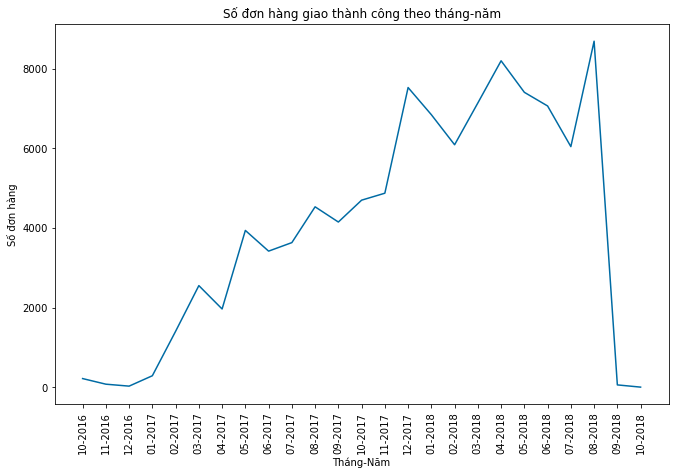

In [561]:
order_counts = delivery_df.groupby('MM_YYYY')['order_id'].count().reset_index(name='order_count')
order_counts['Year'] = order_counts['MM_YYYY'].str.split('-', expand=True)[1].astype(int)
order_counts['Month'] = order_counts['MM_YYYY'].str.split('-', expand=True)[0].astype(int)
order_counts = order_counts.sort_values(['Year','Month'])

plt.figure(figsize=(11,7))
plt.plot(order_counts['MM_YYYY'], order_counts['order_count'])

plt.title('Số đơn hàng giao thành công theo tháng-năm')
plt.xlabel('Tháng-Năm')
plt.ylabel('Số đơn hàng')
plt.xticks(rotation=90)

plt.show();

### 2. Phân bổ thời gian giao hàng

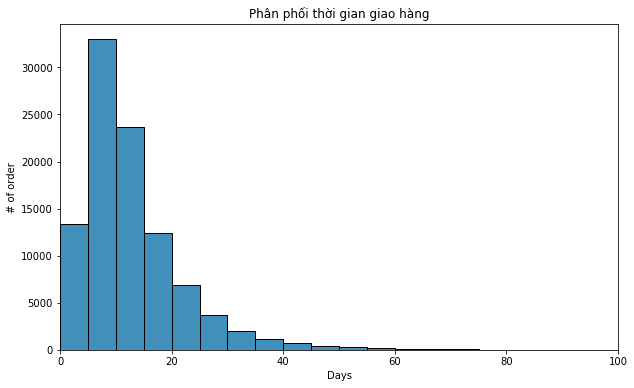

In [562]:
delivery_order = delivery_df[['order_id', 'delivery_days']].drop_duplicates(keep='first')

plt.figure(figsize=(10, 6))
ax = sns.histplot(x='delivery_days', data=delivery_order, binwidth=5)

plt.xlim(0, 100)
ax.set(title='Phân phối thời gian giao hàng', xlabel='Days', ylabel='# of order')
plt.show()

###### -> thời gian chiếm phần lớn trong khoảng 5-10 ngày

### 3. Tỉ lệ giao hàng đúng hạn

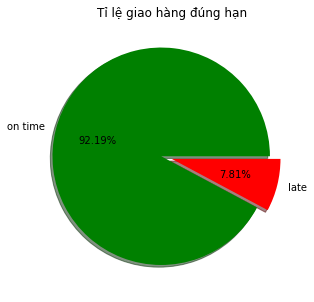

In [563]:
count_estimate = delivery_df['estimate_to_deliver'].value_counts()

plt.figure(figsize=(8,5))

plt.pie(count_estimate.values, explode = [0.1, 0], labels = count_estimate.index, 
        autopct='%1.2f%%', colors=['green', 'red'], shadow=True)

plt.title("Tỉ lệ giao hàng đúng hạn")
plt.show();

###### -> Tỉ lệ giao hàng trễ so với dự kiến chiềm khoảng 7.84%

### 4. Tỉ lệ các khoảng thời gian giao hàng trễ

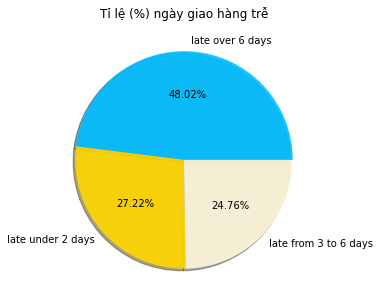

In [564]:
late_df = delivery_df[delivery_df['estimate_to_deliver'] == 'late']
count_estimate_detail = late_df['estimate_detail'].value_counts()

plt.figure(figsize=(10,5))

plt.pie(count_estimate_detail, labels = count_estimate_detail.index,
        autopct = '%1.2f%%', colors=['#00BFFF', '#FFD700', '#FFF8DC'], shadow=True, wedgeprops={"alpha": 0.9})

plt.title('Tỉ lệ (%) ngày giao hàng trễ')
plt.show();

### 5. Điểm đánh giá trung bình cho mỗi tình trạng giao hãng

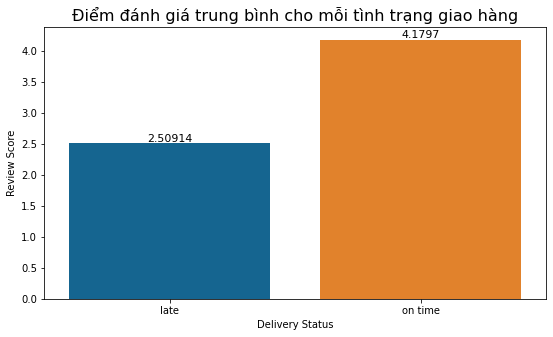

In [565]:
score_mean = delivery_df.groupby('estimate_to_deliver')['review_score'].mean()

fig, ax = plt.subplots(1,1,figsize=(9,5))
ax = sns.barplot(x=score_mean.index, y=score_mean.values, hue_order = score_mean.index)
ax.bar_label(ax.containers[0], fontsize=11)

plt.title('Điểm đánh giá trung bình cho mỗi tình trạng giao hàng', fontsize=16)
plt.xlabel('Delivery Status')
plt.ylabel('Review Score')
plt.show();

###### - > Nhận thấy giao hàng chậm thấp hơn 1 nửa so với đúng giờ. Làm ảnh hưởng đến trải nghiệm khách hàng

### 6. Tỉ lệ gửi hàng đúng / chậm của người bán hàng cho các đối tác giao hàng

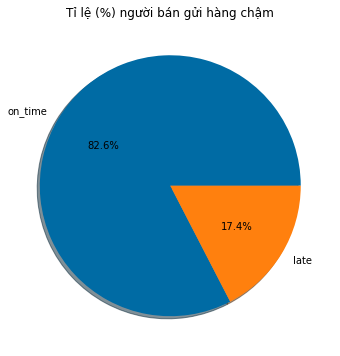

In [566]:
late_seller = delivery_df['seller_detail'].value_counts()

plt.figure(figsize=(10,6))
plt.pie(late_seller, labels=late_seller.index, autopct='%1.1f%%', shadow=True)
plt.title("Tỉ lệ (%) người bán gửi hàng chậm")
plt.show()

###### - > Tỉ lệ người bán chuyển hàng chậm cho đối tác chỉ chiếm 17,3%, tỉ lệ không quá cao. Do đó tỉ lệ giao chậm đơn chủ yếu do bên vận chuyển

### 7. Top 10 người bán có thời gian giao hàng chậm nhất

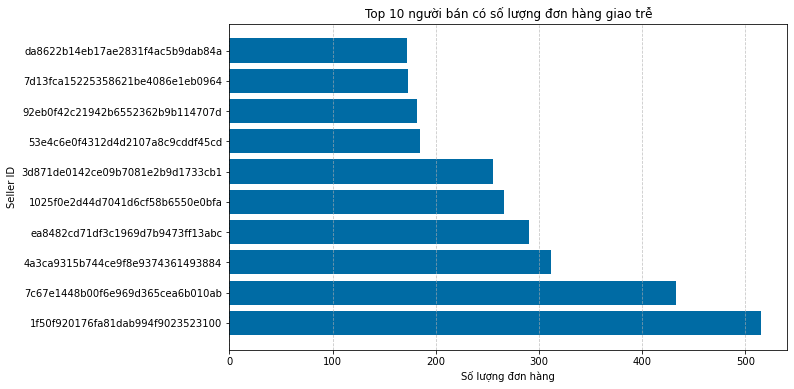

In [567]:
seller = delivery_df[['order_id', 'seller_id', 'seller_detail']]

seller_late_deliver = seller[seller['seller_detail'] == 'late']
seller_late_deliver = seller_late_deliver.drop_duplicates()
# Đếm số lượng order_id theo seller_id
seller_late_deliver_count = seller_late_deliver.groupby('seller_id')['order_id'].count()

# Sắp xếp theo số lượng order_id giảm dần
seller_late_deliver_count = seller_late_deliver_count.sort_values(ascending=False)

# Hiển thị top 10
top_10_sellers_late_deliver = seller_late_deliver_count.head(10)

# Biểu đồ
plt.figure(figsize=(10, 6))
plt.barh(top_10_sellers_late_deliver.index, top_10_sellers_late_deliver.values, )
plt.xlabel("Số lượng đơn hàng")
plt.ylabel("Seller ID")
plt.title("Top 10 người bán có số lượng đơn hàng giao trễ")
plt.grid(axis='x', linestyle='--', alpha=0.7)

### 8. Chi phí giao hàng trung bình dựa trên quãng đường

In [568]:
conditions_2 = [delivery_df['distance'] < 200,
              delivery_df['distance'] <= 400,
              delivery_df['distance'] <= 800]
choices_2 = ['under 200 km', 'from 200 to 400 km', 'from 400 to 800 km']
delivery_df['distance_detail'] = np.select(conditions_2, choices_2, default='over 800 km')

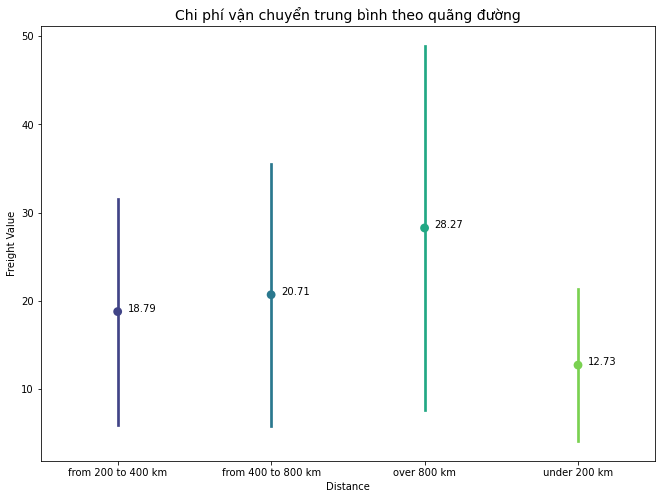

In [569]:
plt.figure(figsize=(11, 8))

sns.pointplot(data=delivery_df,
      x='distance_detail',
      y='freight_value', 
      ci='sd', 
      palette='viridis'
      )

mean_dis = delivery_df.groupby('distance_detail')['freight_value'].mean()

for i, (distance, mean) in enumerate(mean_dis.iteritems()):
    plt.annotate(
        round(mean, 2),
        (i, mean),
        textcoords='offset points',
        xytext=(10, 0),
        ha='left')

plt.title("Chi phí vận chuyển trung bình theo quãng đường", fontsize=14)
plt.xlabel("Distance")
plt.ylabel("Freight Value")
plt.show()

# IV. PHÂN TÍCH SẢN PHẨM & DOANH THU

In [570]:
pd_df = df.copy()

### 1. Top 5 sản phẩm bán chạy nhất

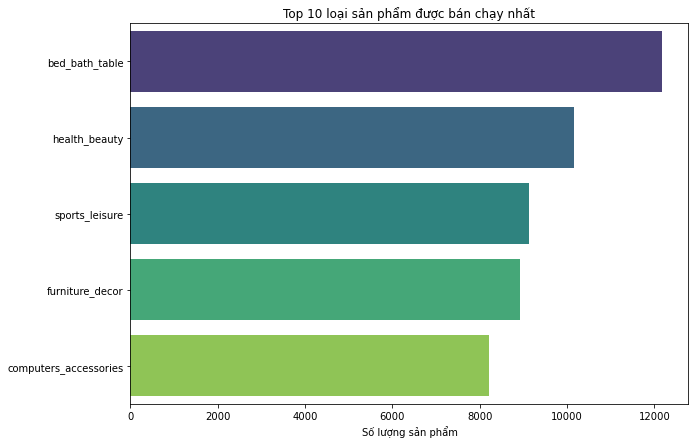

In [571]:
a = pd_df['product_category_name_english'].value_counts().head(5)

plt.figure(figsize=(10, 7))
sns.barplot(x=a.values, y=a.index, palette='viridis')
plt.title('Top 10 loại sản phẩm được bán chạy nhất')
plt.xlabel('Số lượng sản phẩm')
plt.show()

### 2. Top 10 sản phẩm có doanh số cao nhất

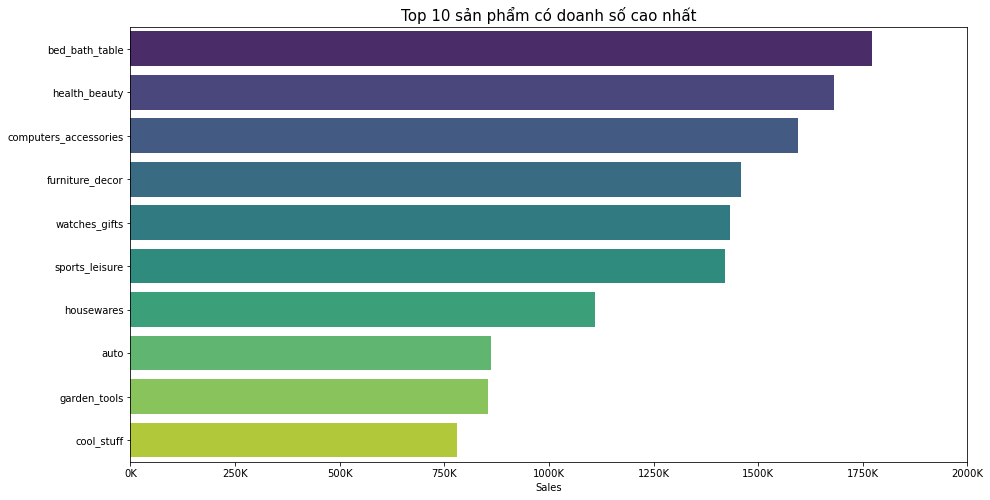

In [572]:
top_sales = pd_df.groupby('product_category_name_english')['payment_value'].sum().reset_index(name='sum_sales').sort_values(by='sum_sales', ascending=False).head(10)

plt.figure(figsize=(15,8))
sns.barplot(x='sum_sales', y='product_category_name_english', data = top_sales, palette='viridis')
plt.title('Top 10 sản phẩm có doanh số cao nhất', fontsize=15)
plt.xlabel('Sales')
plt.ylabel('')

ticks = plt.xticks()[0]
label = [f'{int(tick/1000)}K' for tick in ticks]
plt.xticks(ticks, label)

plt.show()

### 3. Top 10 sản phẩm có đánh giá trung bình cao nhất

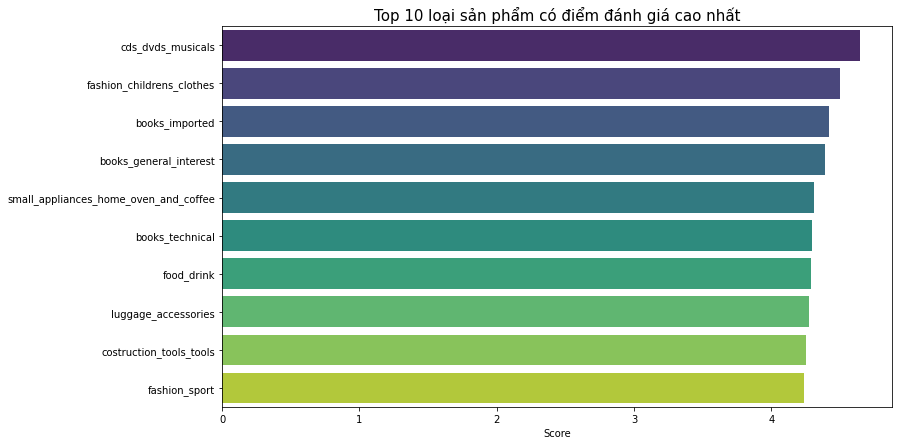

In [573]:
# Tính giá và xếp hạng cho mỗi 'product_category'
cate_group = pd_df.groupby('product_category_name_english')['review_score'].mean().reset_index()
cate_group.rename(columns={'review_score':'avg_product_rating_category'}, inplace=True)
cate_group = cate_group.sort_values(by='avg_product_rating_category', ascending=False).head(10)
# Merge with df

plt.figure(figsize=(12,7))
sns.barplot(x='avg_product_rating_category', y='product_category_name_english', data=cate_group, palette='viridis')
plt.title('Top 10 loại sản phẩm có điểm đánh giá cao nhất', fontsize=15)
plt.xlabel('Score')
plt.ylabel('')
plt.show()

###### -> Cho thấy những sản phẩm mua nhiều nhất lại không có được điểm đánh giá tb cao nhất

### 4. Doanh thu ở các khu vực

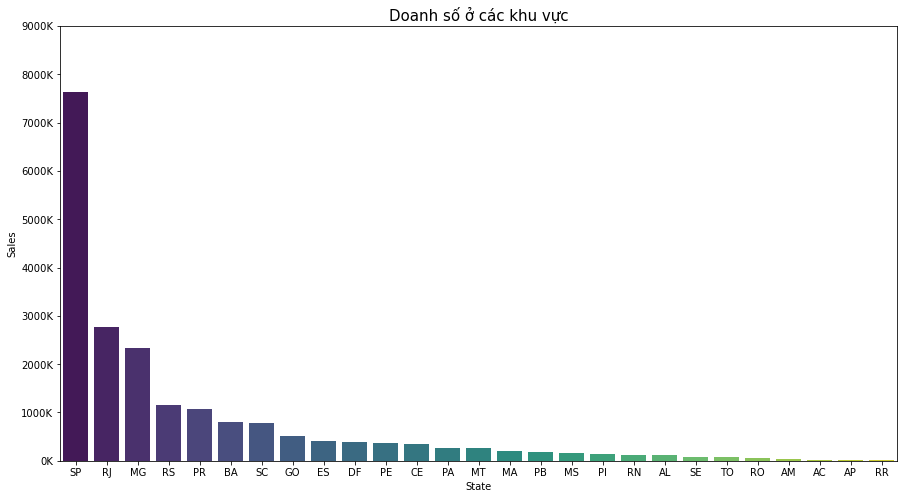

In [574]:
sales_state = pd_df.groupby('customer_state')['payment_value'].sum().reset_index(name='sales').sort_values(by='sales', ascending=False)

plt.figure(figsize=(15,8))
sns.barplot(x='customer_state', y='sales', data = sales_state, palette='viridis')
plt.title('Doanh số ở các khu vực', fontsize=15)
plt.xlabel('State')
plt.ylabel('Sales')

ticks = plt.yticks()[0]
label = [f'{int(tick/1000)}K' for tick in ticks]
plt.yticks(ticks, label)

plt.show()

### 5. Biểu đồ map với size là Doanh số, và màu sắc là Số lượng sản phẩm

In [575]:
map_df = pd_df.groupby(['customer_lat', 'customer_lng']).agg({'order_id':'count', 'payment_value':'sum'}).reset_index()
map_df.rename(columns={'order_id':'Number of order', 'payment_value':'sales'}, inplace=True)

import plotly.express as px

fig = px.scatter_mapbox(map_df, 
                        lat="customer_lat", 
                        lon="customer_lng", 
                        color = 'Number of order',
                        size = 'sales',
                        zoom=5, 
                        height=450,
                        width=900)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()
plt.savefig('map.pdf')

<Figure size 432x288 with 0 Axes>

### 6. Số lượng sản phẩm và doanh thu qua các tháng 

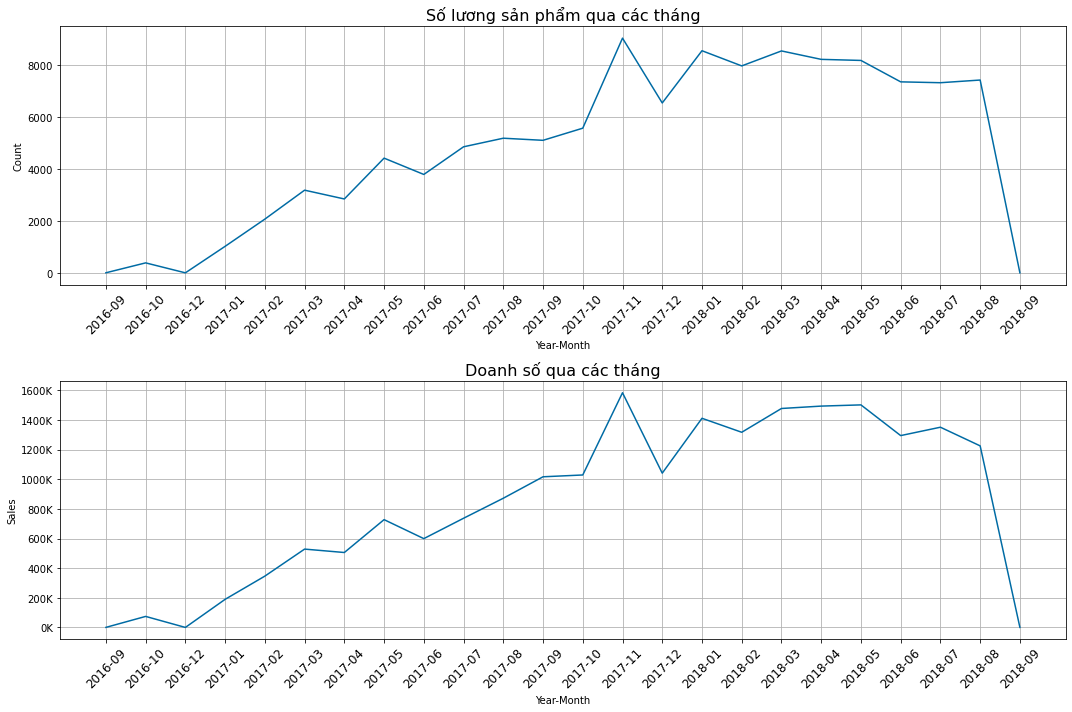

In [576]:
pd_df['month_year'] = pd_df['order_purchase_timestamp'].dt.to_period('M').astype(str)

month_data = pd_df.groupby('month_year').agg({'order_id':'count', 'payment_value':'sum'}).reset_index()

fig, ax = plt.subplots(2, 1, figsize=(15, 10))
sns.lineplot(x='month_year', y='order_id', data=month_data, ax=ax[0])
ax[0].grid()
ax[0].set_title('Số lương sản phẩm qua các tháng', fontsize=16)
ax[0].set(xlabel='Year-Month', ylabel='Count')
ax[0].tick_params(axis='x', rotation=45, labelsize=12)

sns.lineplot(x='month_year', y='payment_value', data=month_data, ax=ax[1])
ax[1].grid()
ax[1].set_title('Doanh số qua các tháng', fontsize=16)
ax[1].set(xlabel='Year-Month', ylabel='Sales')

ax[1].yaxis.set_major_formatter(lambda x, _: f'{x*1e-3:.0f}K')
ax[1].tick_params(axis='x', rotation=45, labelsize=12)

plt.tight_layout()
plt.show()

### 7. Số lượng sản phẩm và doanh thu theo năm

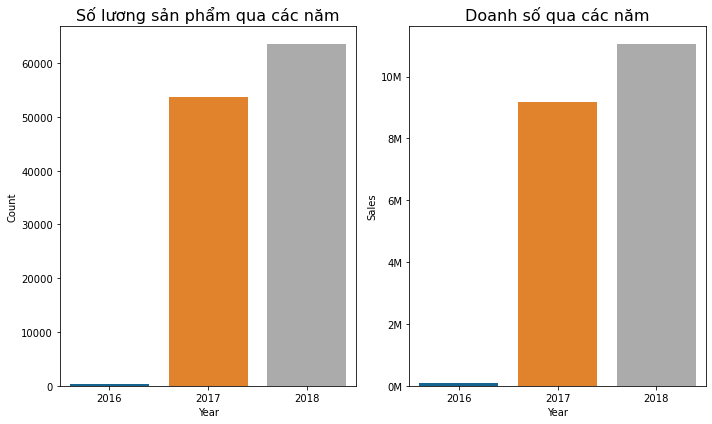

In [577]:
pd_df['year'] = pd_df['order_purchase_timestamp'].dt.year.astype(str)
year_data = pd_df.groupby('year').agg({'order_id':'count', 'payment_value':'sum'}).reset_index()

fig, ax = plt.subplots(1, 2, figsize=(10, 6))
sns.barplot(x='year', y='order_id', data=year_data, ax=ax[0])
ax[0].set_title('Số lương sản phẩm qua các năm', fontsize=16)
ax[0].set(xlabel='Year', ylabel='Count')

sns.barplot(x='year', y='payment_value', data=year_data, ax=ax[1])
ax[1].set_title('Doanh số qua các năm', fontsize=16)
ax[1].set(xlabel='Year', ylabel='Sales')

ax[1].yaxis.set_major_formatter(lambda x, _: f'{x*1e-6:.0f}M')

plt.tight_layout()
plt.show()

### 8. Tính ngày mua hàng khách hàng hay mua trong tuần

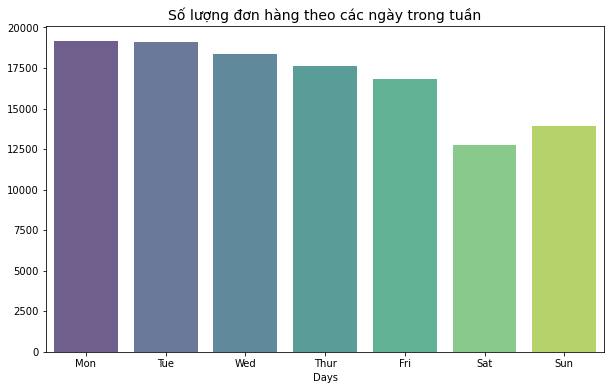

In [578]:
mapping_day = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thur', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

pd_df['weekday'] = pd_df['order_purchase_timestamp'].dt.weekday.map(mapping_day)

b = pd_df['weekday'].value_counts().reindex(mapping_day.values())

plt.figure(figsize=(10, 6))
sns.barplot(x=b.index, y=b.values, alpha=0.8, palette='viridis')
plt.xlabel('Days')
plt.title('Số lượng đơn hàng theo các ngày trong tuần', fontsize=14)

plt.show()

###### -> Cho thấy khách hàng có xu hướng mua hàng vào đầu tuần 

### 9. Số lượng sản phẩm và doanh số theo thời điểm trong ngày

In [579]:
def in_day(row):
    if 4 <= row < 6:
        return 'Dawn'
    elif 6 <= row < 12:
        return 'Morning'
    elif 12 <= row < 18:
        return 'Afternoon'
    elif 18 <= row < 23:
        return 'Evening'
    else: 
        return 'Night'
pd_df['time_in_day'] = pd_df['order_purchase_timestamp'].dt.hour.apply(in_day)

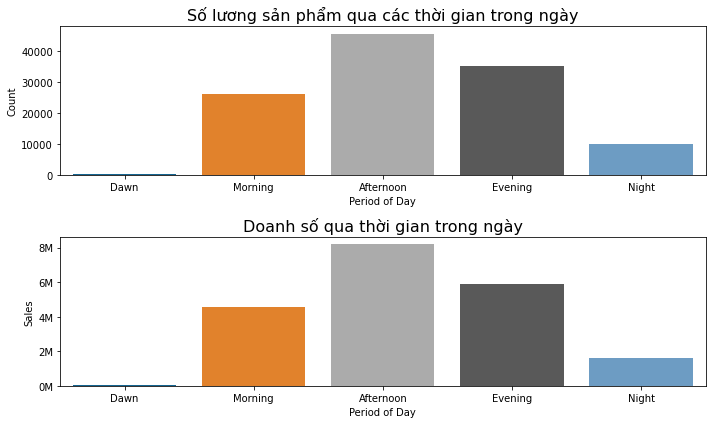

In [580]:
in_day_data = pd_df.groupby('time_in_day').agg({'order_id':'count', 'payment_value':'sum'}).reindex(['Dawn', 'Morning', 'Afternoon', 'Evening', 'Night']).reset_index()

fig, ax = plt.subplots(2, 1, figsize=(10, 6))
sns.barplot(x='time_in_day', y='order_id', data=in_day_data, ax=ax[0])
# ax[0].grid()
ax[0].set_title('Số lương sản phẩm qua các thời gian trong ngày', fontsize=16)
ax[0].set(xlabel='Period of Day', ylabel='Count')
# ax[0].tick_params(axis='x', rotation=45, labelsize=12)

sns.barplot(x='time_in_day', y='payment_value', data=in_day_data, ax=ax[1])
# ax[1].grid()
ax[1].set_title('Doanh số qua thời gian trong ngày', fontsize=16)
ax[1].set(xlabel='Period of Day', ylabel='Sales')

ax[1].yaxis.set_major_formatter(lambda x, _: f'{x*1e-6:.0f}M')
# ax[1].tick_params(axis='x', rotation=45, labelsize=12)

plt.tight_layout()
plt.show()

###### -> Cho thấy khách hàng hay đặt hàng vào buổi trưa và buổi tối khá là cao, có lẽ do đó là thời điểm nghỉ ngơi, rảnh rỗi nên số lượng đặt hàng khá lớn. Giúp doanh số thời điểm này cũng tăng cao. 

# V. PHÂN TÍCH VỀ HÀNH VI KHÁCH HÀNG

In [581]:
customer_df = df.copy()
customer_df['year'] = customer_df['order_purchase_timestamp'].dt.year

### 1. Tỷ lệ đánh giá của khách hàng

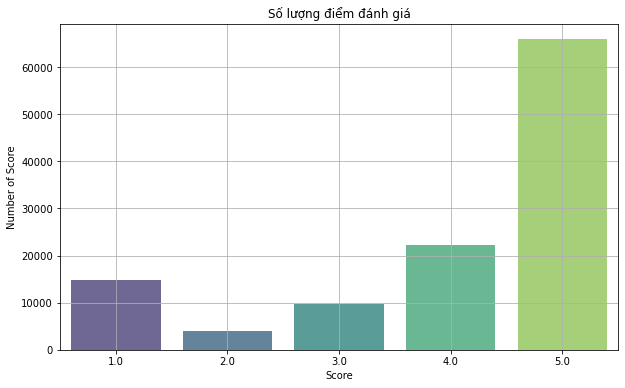

In [582]:
count_score = customer_df[customer_df['review_score'] != 0].groupby('review_score')['review_score'].count()

plt.figure(figsize=(10,6))
sns.barplot(x = count_score.index, y = count_score.values, palette='viridis', alpha=0.8)
plt.title('Số lượng điểm đánh giá')
plt.xlabel('Score')
plt.ylabel('Number of Score')
plt.grid()
plt.show();

###### - > Cho thấy phần lớn khách hàng cảm thấy hài lòng về dịch vụ, khi điểm đánh giá từ 3-5 chiếm khá lớn

### 2. Phương thức thanh toán khách hàng hay sử dụng

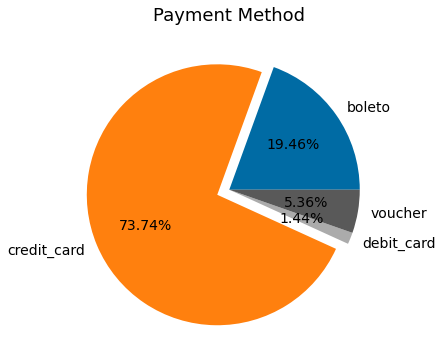

In [583]:
payment_count = customer_df.groupby('payment_type')['payment_type'].count()

plt.figure(figsize=(10,6))
plt.pie(payment_count.values, explode = [0, 0.1, 0, 0], labels = payment_count.index, autopct='%1.2f%%', textprops = {'fontsize':14})
plt.title('Payment Method', fontsize=18)
plt.show()

###### - > Cho thấy khách hàng có xu hướng sử dụng thẻ tin dụng trong thanh toán, khi nó chiếm đến 73% thanh toán. Theo sau là Boleto, 1 hình thức thanh toán phổ biến ở Brazil

### 3. Xu hướng thanh toán và giá trị thanh toán trả góp qua các năm 

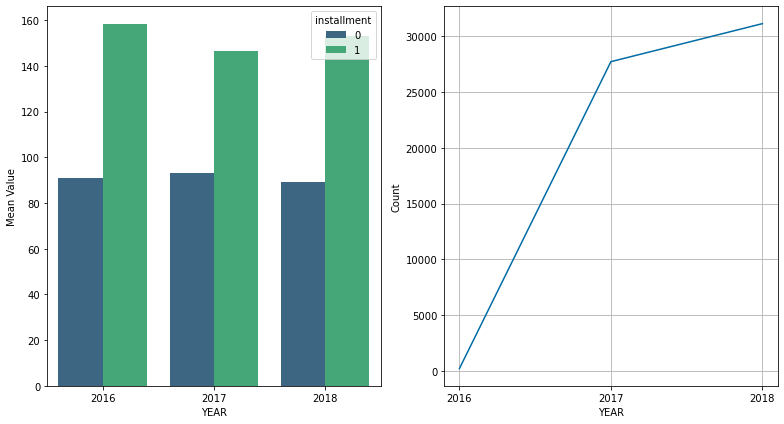

In [584]:
a = customer_df[customer_df['installment'] == True].groupby('year')['installment'].count()
b = customer_df.groupby(['year', 'installment'])['price'].mean().reset_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(11, 6)) 

sns.barplot(x='year', y='price', hue='installment', data=b, ax=ax1, palette='viridis')
ax1.set_xlabel('YEAR')
ax1.set_ylabel('Mean Value')

ax2.plot(a.index, a.values)
ax2.set_xlabel('YEAR')
ax2.set_ylabel('Count')
ax2.set_xticks(a.index)
ax2.grid()

plt.tight_layout()
plt.show()


###### -> Dữ liệu cho thấy khách hàng sử dụng dịch vụ trả góp ngày càng tăng, tuy nhiên về gía trị hàng hóa có dấu hiệu giảm. Điều này cho thấy khách hàng càng ngày càng cẩn trọng trong chi tiêu

### 4. Phân tích RFM ( Recency,  Frequency, Monetary)
##### Recency – a measure of how recently a customer last purchased. (lần mua hàng gần nhất)
##### Frequency – how often they purchase within a given time period. (tần suất mua hàng trong khoảng tgian)
##### Monetary – the amount they spend within a given time period. (dành bao nhiêu tiền cho việc mua hàng)

In [585]:
# thời gian dùng để tham chiếu (cột mốc để tính)
reference_time = customer_df.order_purchase_timestamp.max() + pd.Timedelta(days=1)

# Tính R - F - M
recent = customer_df.groupby('customer_id')['order_purchase_timestamp'].max().reset_index(name='last_order')
recent['recently'] = (reference_time - recent['last_order']).dt.days
recent.drop(columns='last_order', inplace=True)

frequency = customer_df.groupby('customer_id')['order_id'].count().reset_index(name='frequency')

monetary = customer_df.groupby('customer_id')['price'].sum().reset_index(name='monetary')

rfm_df = recent.merge(frequency, on='customer_id').merge(monetary, on='customer_id')
rfm_df.sample(5)

,customer_id,recently,frequency,monetary
78897,cce82cf61ff003ab6f98e70e92045614,111,1,79.99
95916,fa09651333a13aed1e6a71dab1988475,49,1,120.00
70360,b6d713341aa43613bb22cb5e7c2cf46a,529,1,8.90
41046,6b7021aa2622618c2a5fe9639f8282d2,24,1,99.00
113,004df18653e9438571e9d294776a5c5c,91,1,42.00


In [586]:
rfm_df.describe()

,recently,frequency,monetary
count,98176.000000,98176.000000,98176.000000
mean,245.798413,1.199132,144.712451
std,153.443305,0.752925,242.363674
min,1.000000,1.000000,0.850000
25%,122.000000,1.000000,47.650000
50%,227.000000,1.000000,89.500000
75%,356.000000,1.000000,155.000000
max,729.000000,63.000000,13440.000000


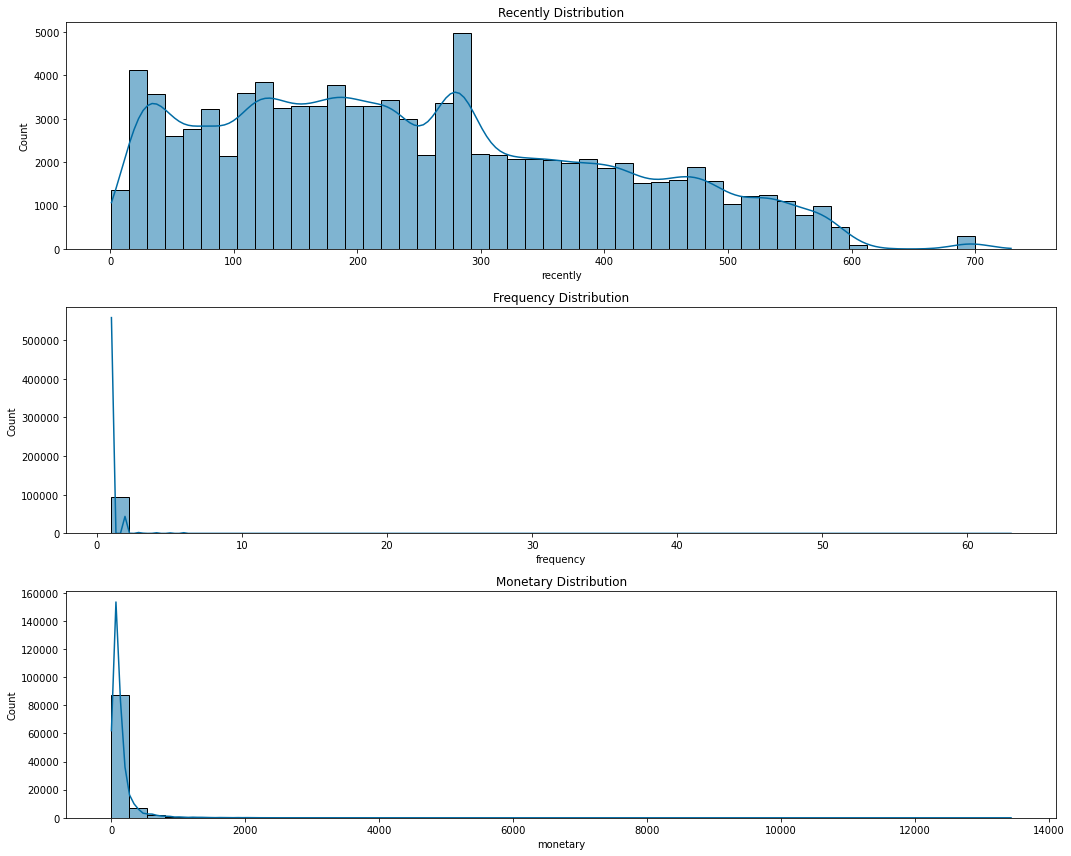

In [587]:
# Visual RFM
fig, ax = plt.subplots(3, 1, figsize=(15,12))

sns.histplot(rfm_df.recently , kde=True, bins = 50, palette = 'viridis', ax = ax[0])
ax[0].set_title('Recently Distribution')

sns.histplot(rfm_df.frequency, kde=True, palette = 'viridis', bins= 50, ax=ax[1])
ax[1].set_title('Frequency Distribution')

sns.histplot(rfm_df.monetary, kde=True, palette = 'viridis', bins = 50, ax=ax[2])
ax[2].set_title('Monetary Distribution')

plt.tight_layout()
plt.show()

######  -> R: Thời gian lần cuôi khách hàng mua hàng khá xa so với thời điểm đo lường, khi trung bình 200-300 ngày, có nhiều khách hàng lên lên tới 400 - 600 ngày 
###### -> F: Tần suất mua hàng của khách hàng khá thấp, trung bình mỗi khách hàng chỉ mua 1 lần
###### -> M: Biểu đồ có các giá trị phân phối tập trung nhiều từ 100 - 200, cho thấy khách hàng chi tiêu khá ít 

### 5. Tỉ lệ khách hàng rời bỏ (Customer Churn Rate)

In [588]:
churn_rate = customer_df.groupby('customer_id')['order_id'].count().reset_index(name='order_count')
churn_rate['churn'] = churn_rate['order_count'].map(lambda x: 'Stay' if x > 1 else 'Churn')
churn_rate.drop(columns='order_count', inplace=True)

In [589]:
churn_rate

,customer_id,churn
0,00012a2ce6f8dcda20d059ce98491703,Churn
1,000161a058600d5901f007fab4c27140,Churn
2,0001fd6190edaaf884bcaf3d49edf079,Churn
3,0002414f95344307404f0ace7a26f1d5,Churn
4,000379cdec625522490c315e70c7a9fb,Churn
...,...,...
98171,fffcb937e9dd47a13f05ecb8290f4d3e,Churn
98172,fffecc9f79fd8c764f843e9951b11341,Stay
98173,fffeda5b6d849fbd39689bb92087f431,Churn
98174,ffff42319e9b2d713724ae527742af25,Churn


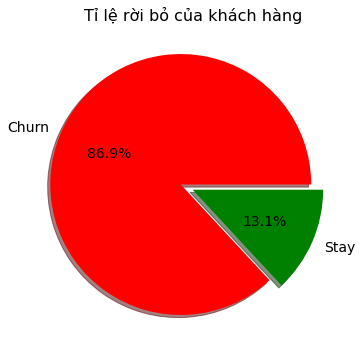

In [590]:
churn_rates = churn_rate['churn'].value_counts()

plt.figure(figsize=(10,6))
plt.pie(churn_rates.values, labels=churn_rates.index,
        autopct='%1.1f%%', explode = [0.1, 0], shadow=True, colors=['red', 'green'], textprops = {'fontsize':14})
plt.title('Tỉ lệ rời bỏ của khách hàng', fontsize=16)
plt.show()

###### -> Tỉ lệ khách hàng rời bỏ đang ở mức khá cao 86,9 %. Nó cho thấy khách hàng chi mua hàng 1 lần và không quay lại

# VI. XÂY DỰNG MÔ HÌNH DỰ BÁO

#### Chúng ta sẽ xây dựng các mô hình dự báo dựa trên các đặc điểm: 
##### X = order_purchase_timestamp, price, freight_value, delivery_hour, installment, review_score
##### Y = payment_value

### Processing

In [591]:
model_df = df.copy()

In [593]:
a = (model_df['order_delivered_customer_date'] - model_df['order_delivered_carrier_date'])
model_df['delivery_hour'] = a/(dt.timedelta(hours=1))

In [594]:
model_df['date'] = model_df['order_purchase_timestamp'].dt.to_period('M')

In [595]:
features = ['date', 'price', 'freight_value', 'delivery_hour', 'installment', 'payment_value']

In [596]:
model_df = model_df[features]

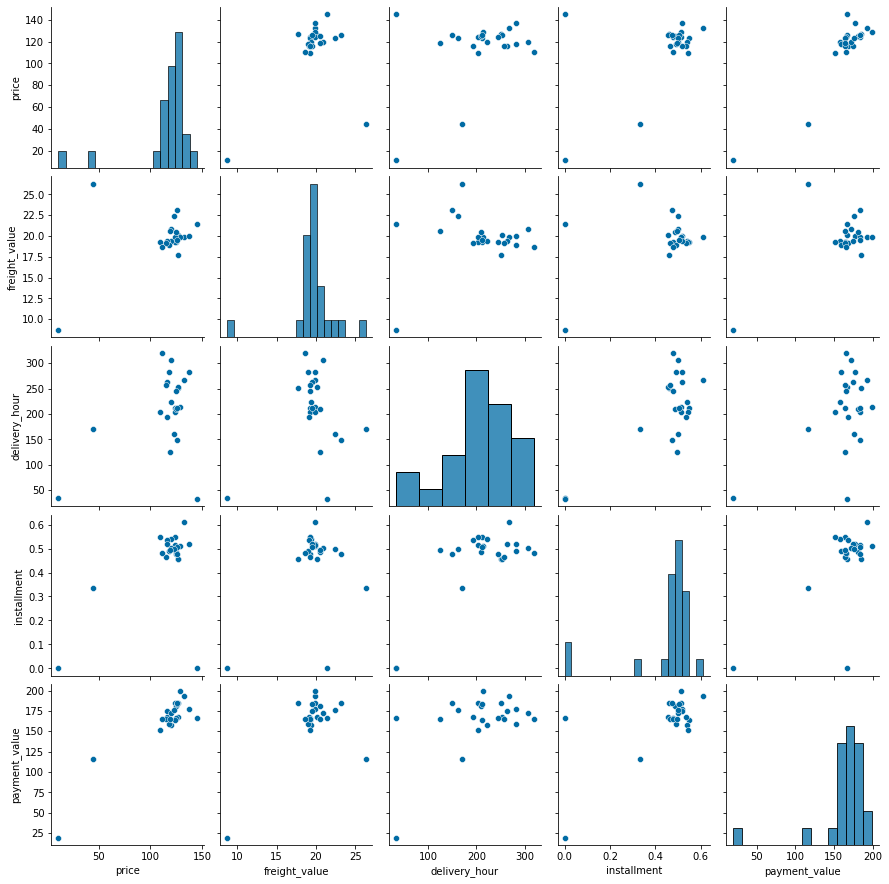

In [720]:
# Biểu đồ thể hiện sự tương quan giữa các biến
sns.pairplot(data=model_df);

In [598]:
model_df = model_df.groupby('date').mean()

In [599]:
model_df

,price,freight_value,delivery_hour,installment,payment_value
date,,,,,
2016-09,44.130000,26.300000,170.739167,0.333333,115.840000
2016-10,132.646545,19.901117,267.834443,0.610390,193.125870
2016-12,10.900000,8.720000,33.671389,0.000000,19.620000
2017-01,126.974897,17.727067,250.629735,0.458456,185.307937
2017-02,126.430483,20.085748,252.389813,0.457046,167.091848
2017-03,124.498855,19.239200,245.442178,0.477729,165.784664
2017-04,137.385900,19.941773,283.108510,0.517375,177.443306
2017-05,123.681404,19.230018,211.359188,0.547592,164.446715
2017-06,119.540862,19.409881,222.794023,0.539273,157.934844


In [600]:
X = model_df.drop(columns=['payment_value'], axis=1)
y = model_df['payment_value']

In [602]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 24 entries, 2016-09 to 2018-09
Freq: M
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          24 non-null     float64
 1   freight_value  24 non-null     float64
 2   delivery_hour  24 non-null     float64
 3   installment    24 non-null     float64
 4   payment_value  24 non-null     float64
dtypes: float64(5)
memory usage: 1.1 KB


### Split Data to Train Model

In [657]:
# Chia tập dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.8, test_size=0.2, random_state=0)

### Linear Regression 

In [642]:
# Xây dựng mô hình
model = LinearRegression()
model.fit(X_train, y_train)
md = model

# Dự báo doanh thu 
y_pred = model.predict(X_test)

In [711]:
# summary of the model 
print('model intercept :', md.intercept_) 
print('model coefficients : ', md.coef_) 
lMSE=mean_squared_error(y_test, y_pred)
print('mean_squared_error: ', mean_squared_error(y_test, y_pred))
lMAE=mean_absolute_error(y_test, y_pred)
print('mean_absolute_error', mean_absolute_error(y_test, y_pred))
lscore = round(r2_score(y_test, y_pred)*100,2)
print(f'Model Score: {round(score, 1)*100}%')

model intercept : -13.474545094018907
model coefficients :  [8.48309391e-01 2.68144348e+00 3.41586877e-02 4.23538750e+01]
mean_squared_error:  102.4828312760897
mean_absolute_error 7.1876754798023
Model Score: 60.0%


In [644]:
prid_df = pd.DataFrame({'sales_real':y_test, 'sales_predict':y_pred})

In [649]:
prid_df

,sales_real,sales_predict
date,,
2017-09,198.915703,178.311235
2017-08,167.930031,165.613474
2018-08,164.792732,167.464843
2017-12,158.926110,167.404140
2018-06,175.776135,177.643347


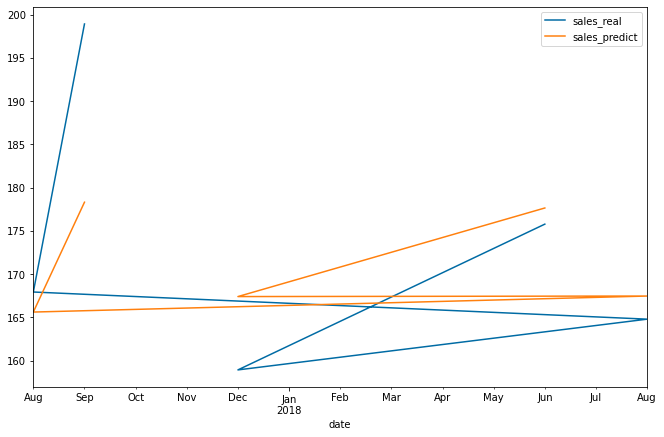

In [661]:
prid_df.plot(figsize=(11,7));

### Random Forest

In [683]:
#Build Model
forest_model = RandomForestRegressor(random_state=1)

#Fit Model to train dataset
forest_model.fit(X_train, y_train)

#Use fitted model to predict sales
sales_preds = forest_model.predict(X_test)

In [710]:
# summary of the model 
rMSE=mean_squared_error(y_test, sales_preds)
print('mean_squared_error: ', mean_squared_error(y_test, sales_preds))
rMAE=mean_absolute_error(y_test, sales_preds)
print('mean_absolute_error', mean_absolute_error(y_test, sales_preds))
rscore = round(r2_score(y_test, sales_preds)*100,2)
print(f'Model Score: {round(score, 1)*100}%')

mean_squared_error:  81.53562932095191
mean_absolute_error 7.178094424635532
Model Score: 60.0%


In [686]:
prid_df = pd.DataFrame({'sales_real':y_test, 'sales_predict':sales_preds})
prid_df

,sales_real,sales_predict
date,,
2017-09,198.915703,182.450476
2017-08,167.930031,164.368362
2018-08,164.792732,172.959604
2017-12,158.926110,166.487383
2018-06,175.776135,175.640703


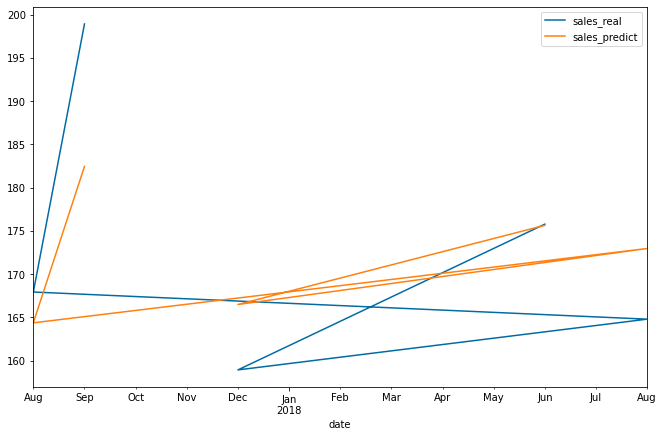

In [687]:
prid_df.plot(figsize=(11,7));

### Decision Tree

In [691]:
#Build Model
decision_model = DecisionTreeRegressor(random_state=1, max_leaf_nodes=500)

#Fit Model to train dataset
decision_model.fit(X_train, y_train)

#Use fitted model to predict sales
sales_preds2 = decision_model.predict(X_test)

In [709]:
dMSE=mean_squared_error(y_test, sales_preds2)
print('mean_squared_error: ', mean_squared_error(y_test, sales_preds2))
dMAE=mean_absolute_error(y_test, sales_preds2)
print('mean_absolute_error', mean_absolute_error(y_test, sales_preds2))
dscore = round(r2_score(y_test, sales_preds2)*100,2)
print(f'Model Score: {round(score, 1)*100}%')

mean_squared_error:  78.29406025115087
mean_absolute_error 7.112471020576794
Model Score: 60.0%


In [696]:
prid_df = pd.DataFrame({'sales_real':y_test, 'sales_predict':sales_preds})
prid_df

,sales_real,sales_predict
date,,
2017-09,198.915703,182.450476
2017-08,167.930031,164.368362
2018-08,164.792732,172.959604
2017-12,158.926110,166.487383
2018-06,175.776135,175.640703


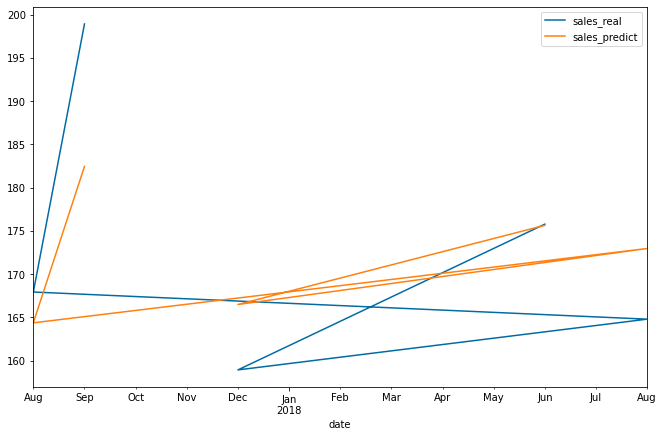

In [697]:
prid_df.plot(figsize=(11,7));

### Thống kê các Model

In [716]:
# thống kê kết quả dự báo doanh thu của các Model:

compare_result = y_test.reset_index()
compare_result['Lr'] = y_pred
compare_result['Rd'] = sales_preds
compare_result['Dt'] = sales_preds2
compare_result

,date,payment_value,Lr,Rd,Dt
0,2017-09,198.915703,178.311235,182.450476,183.340672
1,2017-08,167.930031,165.613474,164.368362,164.776694
2,2018-08,164.792732,167.464843,172.959604,174.996029
3,2017-12,158.926110,167.404140,166.487383,164.776694
4,2018-06,175.776135,177.643347,175.640703,174.996029


In [712]:
#thống kê độ chính xác của các Model:

models = pd.DataFrame({
    'Model': ['Linear Regression',
              'Random Forest', 'Decision Tree'],
    'Score (%)': [lscore, rscore, dscore],
    'MSE': [lMSE, rMSE, dMSE],
    'MAE': [lMAE, rMAE, dMAE]})

models.sort_values(by='Score (%)', ascending=False)

,Model,Score (%),MSE,MAE
2,Decision Tree,59.65,78.294060,7.112471
1,Random Forest,57.98,81.535629,7.178094
0,Linear Regression,47.18,102.482831,7.187675


# VII. CONCLUSION

* Doanh số bán hàng có thể bị ảnh hưởng bởi nhiều lý do, từ giá trị vận chuyển đến danh mục sản phẩm hoặc trạng thái. Tuy nhiên, những sản phẩm có nhiều đơn đặt hàng hơn thường có doanh số bán hàng cao ngay cả với mức giá thấp.
* Hai bang SP và RJ có số lượng đơn đặt hàng và doanh số cao nhất. Điều này có thể là do hầu hết khách hàng của họ mua các mặt hàng thuộc các loại sản phẩm tương tự.
* Khách hàng mua nhiều nhất cư trú ở bang RJ và mua hàng hóa trong khung giá cao cùng một lúc.
* Đối với các sản phẩm tiêu dùng, như thực phẩm hoặc đồ uống, bạn nên xem xét việc có nhiều người bán hơn trong thành phố của người mua. Điều này sẽ giúp giảm thời gian giao hàng. Các phương tiện vận chuyển để giao hàng cho các mặt hàng tiêu dùng như sản phẩm đồ uống cũng cần được xem xét lại.
* Các sản phẩm được đánh giá tốt nhất là sách, tác phẩm nghệ thuật, v.v. Tuy nhiên, doanh số bán hàng cao nhất là các sản phẩm chăm sóc sức khỏe và sắc đẹp, đồng hồ, phụ kiện máy tính, thiết bị và dụng cụ.
* Mô hình Decision Tree có các chỉ số MAE, MSE là thấp nhất và Score là cao nhất. CHo thấy đây là mô hình tốt nhất cho việc dự đoán ở thời điểm hiện tại, tuy nhiên mô hình vẫn còn nhiều điều cần phải cải thiện để có thể đưa ra mức hiệu suất tốt hơn.